## Part 1 Feature Engineering

### Performing Exploratory Data Analysis Using Pandas Profiling Report

In [34]:
import pandas as pd
from pandas_profiling import ProfileReport
df=pd.read_csv("Airlines.csv")
print(df)

profile=ProfileReport(df)
profile.to_file(output_file="Airlines_insights.html")

            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
0            1      CO     269         SFO       IAH          3    15     205   
1            2      US    1558         PHX       CLT          3    15     222   
2            3      AA    2400         LAX       DFW          3    20     165   
3            4      AA    2466         SFO       DFW          3    20     195   
4            5      AS     108         ANC       SEA          3    30     202   
...        ...     ...     ...         ...       ...        ...   ...     ...   
539378  539379      CO     178         OGG       SNA          5  1439     326   
539379  539380      FL     398         SEA       ATL          5  1439     305   
539380  539381      FL     609         SFO       MKE          5  1439     255   
539381  539382      UA      78         HNL       SFO          5  1439     313   
539382  539383      US    1442         LAX       PHL          5  1439     301   

        Delay  
0          

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

G:\PYTHON\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Importing the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [36]:
dataset=pd.read_csv("Airlines.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


## Taking care of missing values if present

In [37]:
dataset.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

## Checking the outliers

In [40]:
dataset.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [41]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
Q1

id           134846.5
Flight          712.0
DayOfWeek         2.0
Time            565.0
Length           81.0
Delay             0.0
Name: 0.25, dtype: float64

In [42]:
Q3=dataset.quantile(0.75)
Q3

id           404537.5
Flight         3745.0
DayOfWeek         5.0
Time           1035.0
Length          162.0
Delay             1.0
Name: 0.75, dtype: float64

In [43]:
IQR=Q3-Q1
IQR

id           269691.0
Flight         3033.0
DayOfWeek         3.0
Time            470.0
Length           81.0
Delay             1.0
dtype: float64

In [44]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [45]:
lower_limit

id          -269690.0
Flight        -3837.5
DayOfWeek        -2.5
Time           -140.0
Length          -40.5
Delay            -1.5
dtype: float64

In [46]:
upper_limit

id           809074.0
Flight         8294.5
DayOfWeek         9.5
Time           1740.0
Length          283.5
Delay             2.5
dtype: float64

In [47]:
dataset[(dataset<lower_limit)|(dataset>upper_limit)]

C:\Users\Manmeet Singh\AppData\Local\Temp\ipykernel_3248\1996226988.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset[(dataset<lower_limit)|(dataset>upper_limit)]


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
539378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,326.0,NaN
539379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.0,NaN
539380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.0,NaN


In [48]:
dataset_without_outliers=dataset[(dataset>lower_limit)&(dataset<upper_limit)]

C:\Users\Manmeet Singh\AppData\Local\Temp\ipykernel_3248\3578154692.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset_without_outliers=dataset[(dataset>lower_limit)&(dataset<upper_limit)]


In [49]:
dataset_without_outliers

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,NaN,269,NaN,NaN,3,15,205.0,1
1,2,NaN,1558,NaN,NaN,3,15,222.0,1
2,3,NaN,2400,NaN,NaN,3,20,165.0,1
3,4,NaN,2466,NaN,NaN,3,20,195.0,1
4,5,NaN,108,NaN,NaN,3,30,202.0,0
...,...,...,...,...,...,...,...,...,...
539378,539379,NaN,178,NaN,NaN,5,1439,NaN,0
539379,539380,NaN,398,NaN,NaN,5,1439,NaN,0
539380,539381,NaN,609,NaN,NaN,5,1439,255.0,0
539381,539382,NaN,78,NaN,NaN,5,1439,NaN,1


## As Some of the outliers are the natural variation in the dataset so therefore we are not removing them over here

G:\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay', ylabel='Length'>

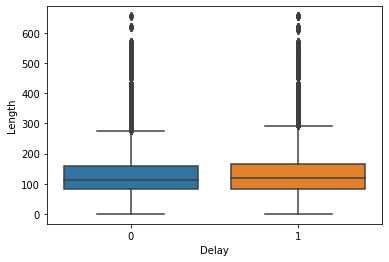

In [50]:
sns.boxplot("Delay","Length",data=dataset)

## Encoding the categorical variables

In [51]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X[:,0:1]=encoder.fit_transform(X[:,0:1])
X[:,2:3]=encoder.fit_transform(X[:,2:3])
X[:,3:4]=encoder.fit_transform(X[:,3:4])

## Splitting the dataset into training set and testing set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Selection

In [26]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [27]:
var_thres.get_support() 

array([ True,  True,  True,  True,  True,  True,  True])

In [29]:
X = dataset.drop(['id','Delay'],axis=1)   #Feature Matrix
y = dataset["Delay"] 

In [32]:
X_train.corr()

,Flight,DayOfWeek,Time,Length
Flight,1.000000,0.000477,-0.006553,-0.340438
DayOfWeek,0.000477,1.000000,0.001824,0.013994
Time,-0.006553,0.001824,1.000000,-0.020705
Length,-0.340438,0.013994,-0.020705,1.000000


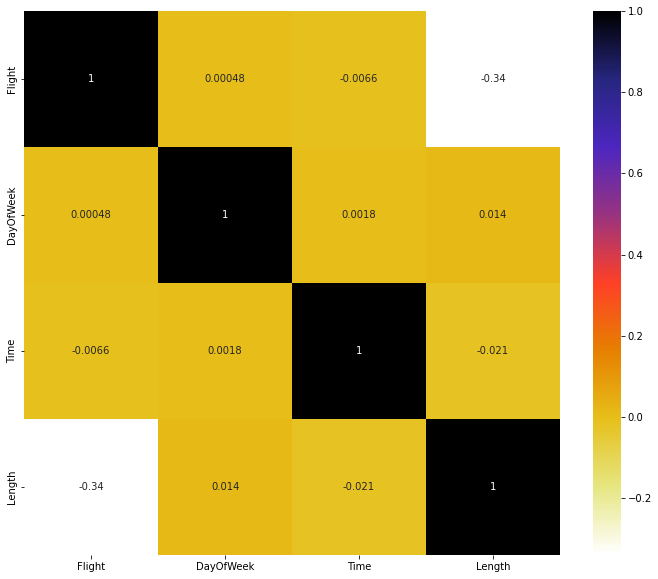

In [33]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr() ## finding the correlation in the training set over here for the machine learning model
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

# and we have taken this function code from the sklearn API
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

0

In [19]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03981723, 0.02296618, 0.01821152, 0.01522131, 0.00783166,
       0.02048138, 0.00923541])

In [20]:
mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

0    0.039817
1    0.022966
5    0.020481
2    0.018212
3    0.015221
6    0.009235
4    0.007832
dtype: float64

<AxesSubplot:>

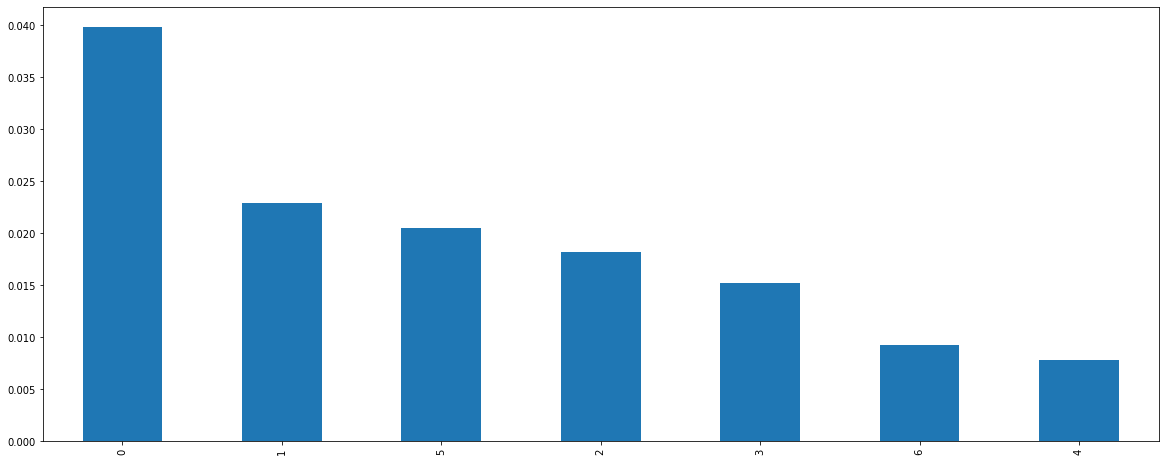

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [53]:
dataset.drop(['DayOfWeek','Length'],axis=1,inplace=True)

In [54]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [55]:
dataset

,id,Airline,Flight,AirportFrom,AirportTo,Time,Delay
0,1,CO,269,SFO,IAH,15,1
1,2,US,1558,PHX,CLT,15,1
2,3,AA,2400,LAX,DFW,20,1
3,4,AA,2466,SFO,DFW,20,1
4,5,AS,108,ANC,SEA,30,0
...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,1439,0
539379,539380,FL,398,SEA,ATL,1439,0
539380,539381,FL,609,SFO,MKE,1439,0
539381,539382,UA,78,HNL,SFO,1439,1


In [56]:
dataset.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
Time           0
Delay          0
dtype: int64

## Our dataset is balanced over here

In [57]:
dataset["Delay"].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [58]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X[:,0:1]=encoder.fit_transform(X[:,0:1])
X[:,2:3]=encoder.fit_transform(X[:,2:3])
X[:,3:4]=encoder.fit_transform(X[:,3:4])

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Training the model on the training set

In [60]:
# from sklearn.linear_model import LogisticRegression
# classifier=LogisticRegression(random_state=0)
# classifier.fit(X_train,y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
# classifier.fit(X_train,y_train)

# from sklearn.naive_bayes import GaussianNB
# classifier=GaussianNB()
# classifier.fit(X_train,y_train)



from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25,criterion="entropy",random_state=42)
classifier.fit(X_train,y_train)

# from sklearn.tree import DecisionTreeClassifier
# classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
# classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=42)

In [61]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[1 1]
 [1 1]
 [1 0]
 ...
 [0 0]
 [0 1]
 [1 0]]


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)



[[44484 15395]
 [21111 26887]]


0.6615960770136359

In [63]:
cr=classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.68      0.74      0.71     59879
           1       0.64      0.56      0.60     47998

    accuracy                           0.66    107877
   macro avg       0.66      0.65      0.65    107877
weighted avg       0.66      0.66      0.66    107877

